---
<strong>
    <h1 align='center'>Text Classification</h1>
</strong>

---

## Gather the data

we'll use the `20 Newsgroups` dataset, which contains newsgroup documents categorized into 20 different groups. You can download it from scikit-learn's dataset loader

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

X = newsgroups.data
y = newsgroups.target

## Preprocess the data

Preprocessing involves `tokenization`, removing stopwords, and converting text data into numerical vectors. We'll use scikit-learn's CountVectorizer for this

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer(max_features=5000)  # You can adjust the number of features
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build and training the model & Ploting model loss and accuracy

Now, we'll build a simple neural network model using `TensorFlow/Keras`

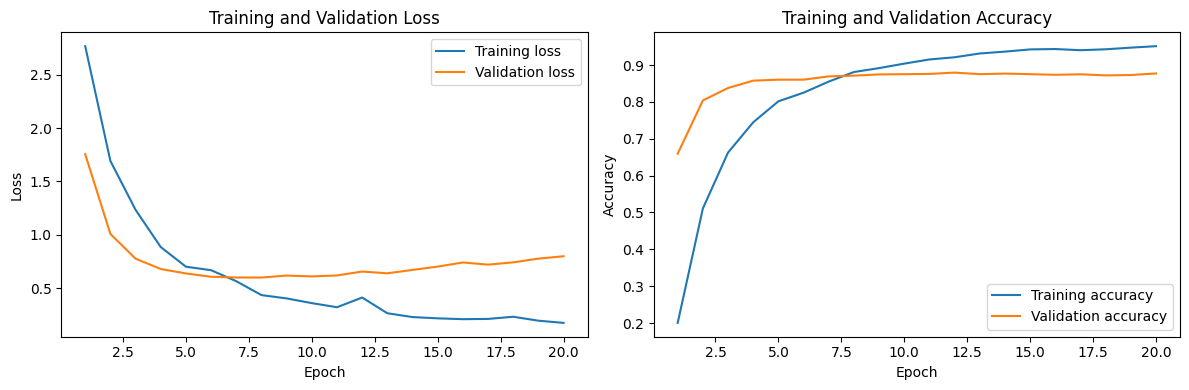

189/189 [==============================] - 1s 7ms/step - loss: 0.1748 - accuracy: 0.9513 - val_loss: 0.7990 - val_accuracy: 0.8773


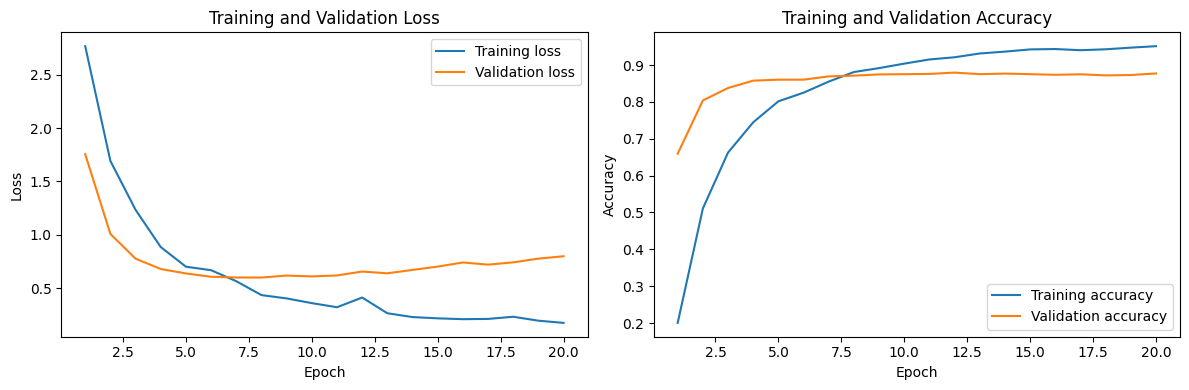

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from IPython.display import clear_output
from IPython import display as ipy_display
import numpy as np  # Import NumPy for array handling

# Enable interactive mode for matplotlib to show live updating plots
plt.ion()

# Define a custom callback to update and display the plot during training
class PlotLossAccuracyCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.losses = []
        self.accs = []
        self.val_losses = []
        self.val_accs = []
        self.epochs = []
        self.fig, (self.ax1, self.ax2) = plt.subplots(1, 2, figsize=(12, 4))

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs['loss'])
        self.accs.append(logs['accuracy'])
        self.val_losses.append(logs['val_loss'])
        self.val_accs.append(logs['val_accuracy'])
        self.epochs.append(epoch + 1)

        self.ax1.cla()
        self.ax2.cla()

        self.ax1.plot(self.epochs, self.losses, label='Training loss')
        self.ax1.plot(self.epochs, self.val_losses, label='Validation loss')
        self.ax1.set_title('Training and Validation Loss')
        self.ax1.set_xlabel('Epoch')
        self.ax1.set_ylabel('Loss')

        self.ax2.plot(self.epochs, self.accs, label='Training accuracy')
        self.ax2.plot(self.epochs, self.val_accs, label='Validation accuracy')
        self.ax2.set_title('Training and Validation Accuracy')
        self.ax2.set_xlabel('Epoch')
        self.ax2.set_ylabel('Accuracy')

        self.ax1.legend()
        self.ax2.legend()
        plt.tight_layout()

        # Clear the previous figure and display the updated plot in real-time
        ipy_display.clear_output(wait=True)
        ipy_display.display(plt.gcf())

# Create an instance of the custom callback
plot_callback = PlotLossAccuracyCallback()

# Assuming you have X_train and y_train defined elsewhere in your code as NumPy arrays
# No need to convert them, as they are already in the correct format

# Define and compile your model
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(20, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Convert sparse matrix to NumPy arrays
X_train = X_train.toarray()
y_train = np.array(y_train)


# Train the model and pass the callback
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[plot_callback])

# Turn off interactive mode after training
plt.ioff()

## Evaluate the model

Evaluate the model on the test data to assess its performance:

In [4]:
loss, accuracy = model.evaluate(X_test.toarray(), y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


118/118 [==============================] - 0s 3ms/step - loss: 0.6516 - accuracy: 0.8706
Test loss: 0.6516
Test accuracy: 0.8706


## Make predictions

You can use the trained model to classify new text:

In [5]:
new_text = ["The latest space mission discovered fascinating exoplanets"]
new_text_vec = vectorizer.transform(new_text)
predicted_class = model.predict(new_text_vec.toarray())
print(predicted_class)

1/1 [==============================] - 0s 86ms/step
[[2.6877536e-03 5.1227966e-03 3.8224333e-03 1.0123852e-03 4.8485547e-03
  3.5858767e-03 3.0645297e-03 8.6382293e-04 2.2584039e-03 1.9467972e-03
  6.3677394e-04 7.4676129e-05 3.1874336e-03 6.1641634e-03 9.4310755e-01
  6.4712097e-03 4.1381296e-04 1.4975618e-03 1.1236824e-03 8.1097670e-03]]


## Plotting the Predictions

1/1 [==============================] - 0s 24ms/step


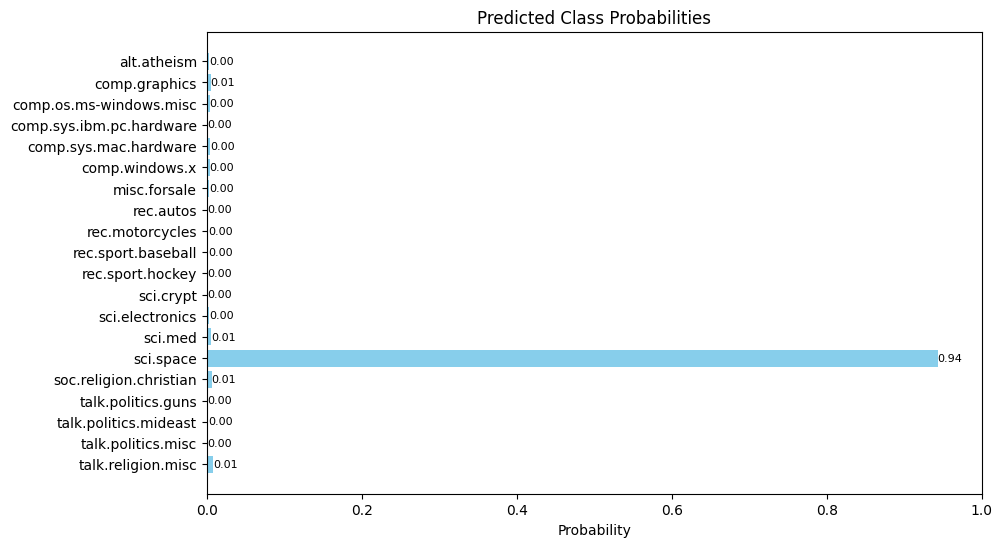

In [6]:
import matplotlib.pyplot as plt

predicted_class = model.predict(new_text_vec.toarray())[0]
categories = newsgroups.target_names  # Names of the 20 categories

plt.figure(figsize=(10, 6))
plt.barh(categories, predicted_class, color='skyblue')
plt.xlabel('Probability')
plt.title('Predicted Class Probabilities')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest probability at the top

# Add probability values as labels
for i, prob in enumerate(predicted_class):
    plt.text(prob, i, f'{prob:.2f}', ha='left', va='center', fontsize=8)

plt.show()

## Testing the performance with other Sample Text

- `"I just bought a new computer and it works great!"`: This text might be classified under the `comp.sys.ibm.pc.hardware` or `comp.sys.mac.hardware` categories.

- `"The latest space mission discovered fascinating exoplanets."`: This text could belong to the `sci.space` category.

- `"I'm selling my old car. It's in excellent condition."`: This text may be categorized under `misc.forsale` or `rec.autos.`

- `"I have a question about the stock market."`: This text might be classified under `misc.forsale` or `talk.politics.guns.`

- `"What are the best programming languages for data science?"`: This text could be categorized under `comp.graphics` or `comp.windows.x.`

- `"I don't believe in any gods."`: This text may belong to the `alt.atheism` category.

- `"The latest political debate was intense."`: This text could be classified under "talk.politics.guns" or `talk.politics.misc.`

1/1 [==============================] - 0s 17ms/step


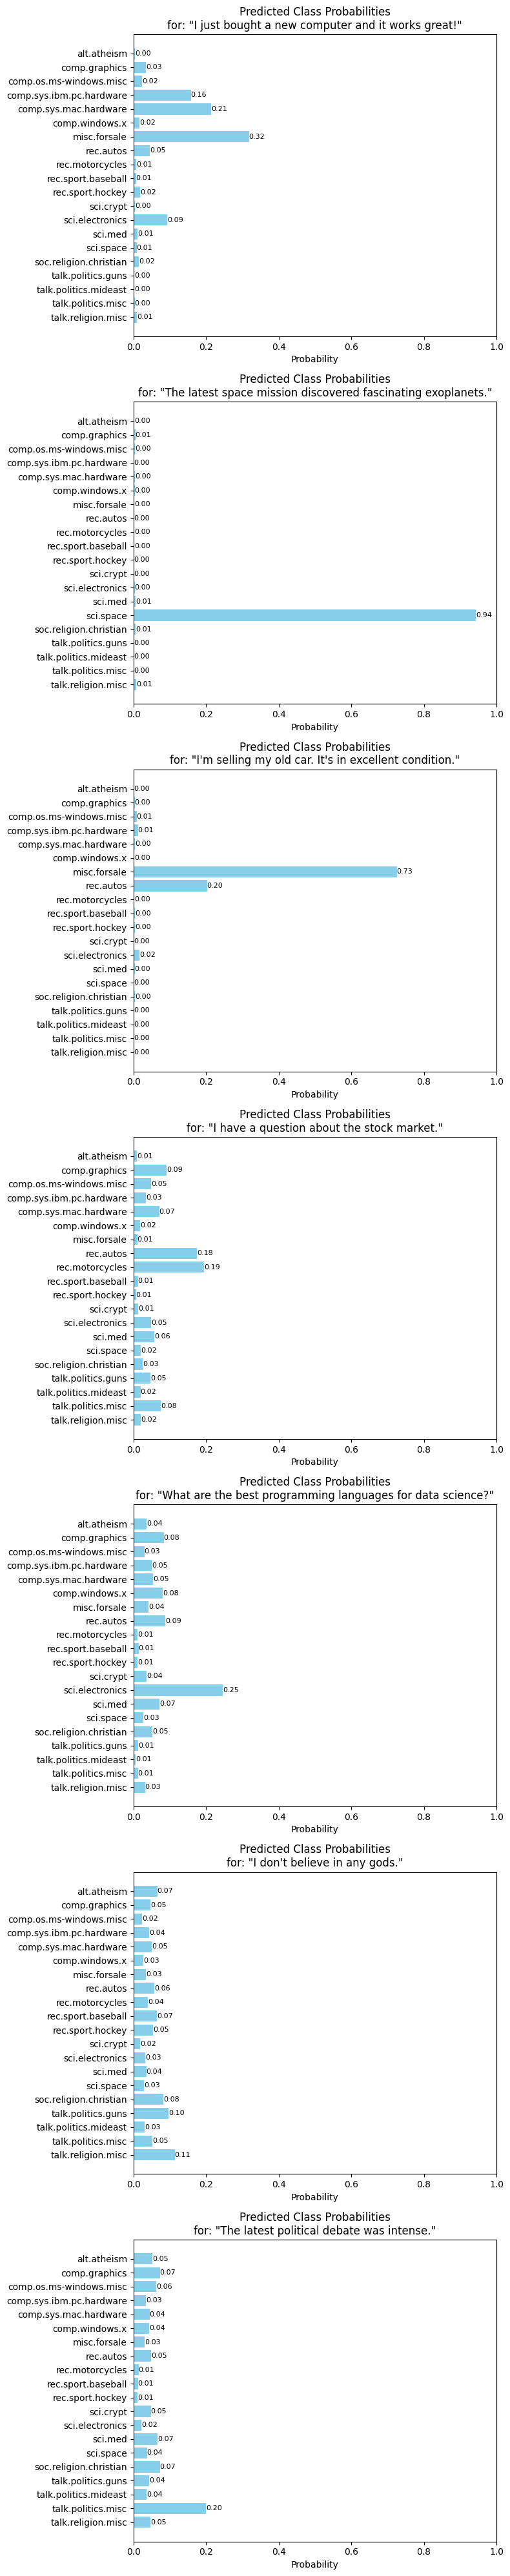

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Sample texts and their corresponding categories
sample_texts = [
    "I just bought a new computer and it works great!",
    "The latest space mission discovered fascinating exoplanets.",
    "I'm selling my old car. It's in excellent condition.",
    "I have a question about the stock market.",
    "What are the best programming languages for data science?",
    "I don't believe in any gods.",
    "The latest political debate was intense."
]

# Vectorize the sample texts
sample_text_vectors = vectorizer.transform(sample_texts)

# Predict class probabilities for each sample text
predicted_probabilities = model.predict(sample_text_vectors.toarray())

# Category names
categories = newsgroups.target_names

# Create a bar chart for each sample text
plt.figure(figsize=(8, 40))
for i, text in enumerate(sample_texts):
    plt.subplot(7, 1, i + 1)
    plt.barh(categories, predicted_probabilities[i], color='skyblue')
    plt.xlabel('Probability')
    plt.title(f'Predicted Class Probabilities\nfor: "{text}"')
    plt.xlim(0, 1)
    plt.gca().invert_yaxis()

    # Add probability values as labels
    for j, prob in enumerate(predicted_probabilities[i]):
        plt.text(prob, j, f'{prob:.2f}', ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()


This is a basic text classification example. Depending on your specific project requirements and dataset, you may need to fine-tune the model architecture, perform hyperparameter tuning, and handle issues like class imbalance or text preprocessing variations.

For real-world projects, consider using more advanced models like `LSTM`, `GRU`, or transformer-based models like `BERT` for better performance. Additionally, collecting and annotating your own dataset tailored to your specific classification task is crucial for achieving meaningful results.

#### $\color{skyblue}{\textbf{Connect with me:}}$


[<img align="left" src="https://cdn4.iconfinder.com/data/icons/social-media-icons-the-circle-set/48/twitter_circle-512.png" width="32px"/>][twitter]
[<img align="left" src="https://cdn-icons-png.flaticon.com/512/145/145807.png" width="32px"/>][linkedin]
[<img align="left" src="https://cdn2.iconfinder.com/data/icons/whcompare-blue-green-web-hosting-1/425/cdn-512.png" width="32px"/>][Portfolio]

[twitter]: https://twitter.com/F4izy
[linkedin]: https://www.linkedin.com/in/mohd-faizy/
[Portfolio]: https://mohdfaizy.com/
